In [219]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [220]:
df = pd.read_csv("ex2data1.txt", names=['mark1', 'mark2', 'status'])
df.head()

,mark1,mark2,status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'mark 2')

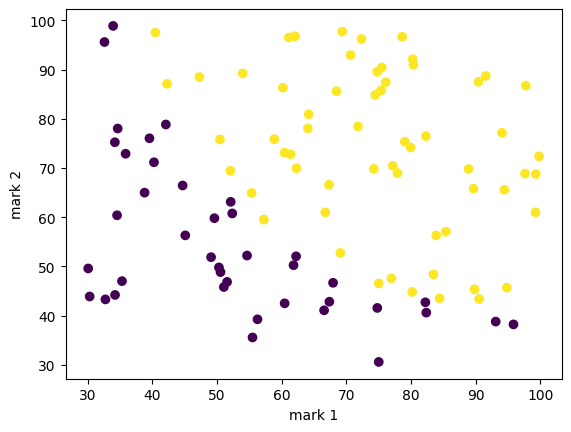

In [221]:
plt.scatter(df['mark1'], df['mark2'], c = df['status'])
plt.xlabel('mark 1')
plt.ylabel('mark 2')

In [222]:
def g(z):
    return 1/(1 + np.exp(-z))
def h(theta, x):
    return g(x.dot(theta))

In [223]:
def loss_func(theta, x, y):
    return (-1/y.size *(y.T.dot(np.log(h(theta, x))) + (1-y).T.dot(np.log(1-h(theta,x))))).mean()

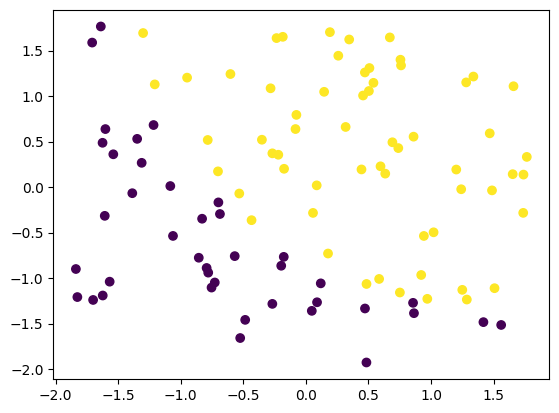

In [224]:
x = df[['mark1', 'mark2']].values

def normalize(x):
  std_fixed = np.zeros_like(np.std(x, axis=0))
  std_fixed[np.std(x, axis=0) == 0] = 1
  std_fixed += np.std(x, axis=0)
  return (x - np.mean(x, axis=0))/std_fixed, np.mean(x, axis=0), np.std(x, axis=0)

x, mean, std = normalize(x)
x = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)

y = df['status'].values
y = y.reshape((-1, 1))
plt.scatter(x[:,1], x[:,2], c = y)

In [225]:
def grad_desc(loss_func, theta, x, y, a):
    m = y.size
    h = g(x.dot(theta))
    loss_values = [loss_func(theta, x, y)]
    last_l = loss_func(theta, x, y) + 10
    while(np.abs(loss_func(theta, x, y) - last_l)>5e-8):
        loss_values.append(last_l)
        h = g(x.dot(theta))
        last_l = loss_func(theta, x, y)
        gradient = x.T.dot(h - y)/y.size
        theta -= a * gradient
    return theta, loss_values

Text(0, 0.5, 'loss function value')

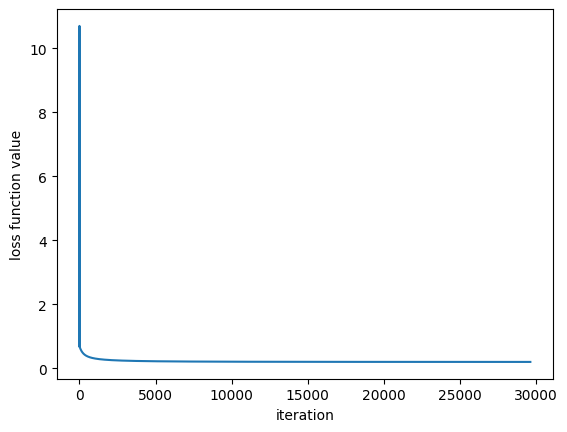

In [226]:
theta = [[0.], [0.], [0.]]
theta, loss_values = grad_desc(loss_func, theta, x, y, 0.01)
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel("iteration")
plt.ylabel("loss function value")

Text(0, 0.5, 'mark 2')

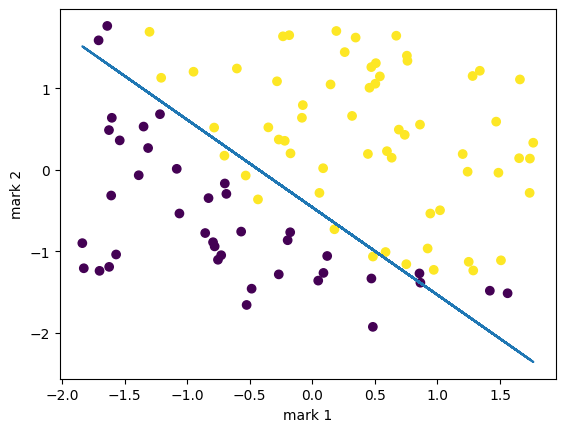

In [227]:
line = -theta[0]/theta[2] - theta[1]/theta[2]*(x[:,1])
plt.scatter(x[:,1], x[:,2], c = y)
plt.plot(x[:,1], line)
plt.xlabel('mark 1')
plt.ylabel('mark 2')

In [228]:
x_pred = np.array([1, (45-mean[0])/std[0], (85-mean[1])/std[1]])
print(f"Студент набравший 45 баллов по 1 экзамену и 85 баллов по 2 экзамену поступит с вероятностью {h(theta, x_pred).mean()*100 : .2f}%")

Студент набравший 45 баллов по 1 экзамену и 85 баллов по 2 экзамену поступит с вероятностью  75.96%


In [229]:
def accuracy(theta, x, h, y):
    temp = 0
    for i in range(y.size):
        if h(theta, x[i]).mean().round() ==  y[i]:
            temp += 1
    return temp/y.size

In [230]:
print(f'Точность модели на обучающей выборке составляет {accuracy(theta, x, h, y)*100 : .0f}%')

Точность модели на обучающей выборке составляет  89%
